In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
df = pd.read_json("../models/model_init/eval_predictions.jsonl", lines=True)

In [25]:
df = pd.concat([df.drop(["answers"], axis=1), df["answers"].apply(pd.Series)], axis=1)
ans_col = ["ans" + str(i + 1) for i in range(6)]
df[ans_col] = pd.DataFrame(df["text"].tolist())

df 

,id,title,context,question,predicted_answer,text,answer_start,ans1,ans2,ans3,ans4,ans5,ans6
0,56be4db0acb8001400a502ec,Super_Bowl_50,Super Bowl 50 was an American football game to...,Which NFL team represented the AFC at Super Bo...,Denver Broncos,"[Denver Broncos, Denver Broncos, Denver Broncos]","[177, 177, 177]",Denver Broncos,Denver Broncos,Denver Broncos,None,None,None
1,56be4db0acb8001400a502ed,Super_Bowl_50,Super Bowl 50 was an American football game to...,Which NFL team represented the NFC at Super Bo...,Denver Broncos defeated the National Football ...,"[Carolina Panthers, Carolina Panthers, Carolin...","[249, 249, 249]",Carolina Panthers,Carolina Panthers,Carolina Panthers,None,None,None
2,56be4db0acb8001400a502ee,Super_Bowl_50,Super Bowl 50 was an American football game to...,Where did Super Bowl 50 take place?,Levi's Stadium,"[Santa Clara, California, Levi's Stadium, Levi...","[403, 355, 355]","Santa Clara, California",Levi's Stadium,Levi's Stadium in the San Francisco Bay Area a...,None,None,None
3,56be4db0acb8001400a502ef,Super_Bowl_50,Super Bowl 50 was an American football game to...,Which NFL team won Super Bowl 50?,Denver Broncos defeated the National Football ...,"[Denver Broncos, Denver Broncos, Denver Broncos]","[177, 177, 177]",Denver Broncos,Denver Broncos,Denver Broncos,None,None,None
4,56be4db0acb8001400a502f0,Super_Bowl_50,Super Bowl 50 was an American football game to...,What color was used to emphasize the 50th anni...,gold,"[gold, gold, gold]","[488, 488, 521]",gold,gold,gold,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10565,5737aafd1c456719005744fb,Force,"The pound-force has a metric counterpart, less...",What is the metric term less used than the New...,pound-force,"[kilogram-force, pound-force, kilogram-force (...","[82, 4, 82, 82, 78]",kilogram-force,pound-force,kilogram-force (kgf),kilogram-force,the kilogram-force (,None
10566,5737aafd1c456719005744fc,Force,"The pound-force has a metric counterpart, less...",What is the kilogram-force sometimes reffered ...,kilopond,"[kilopond, kilopond, kilopond, kilopond, kilop...","[114, 114, 114, 114, 114]",kilopond,kilopond,kilopond,kilopond,kilopond,None
10567,5737aafd1c456719005744fd,Force,"The pound-force has a metric counterpart, less...",What is a very seldom used unit of mass in the...,The kilogram-force,"[slug, metric slug, metric slug, metric slug, ...","[274, 267, 267, 267, 263]",slug,metric slug,metric slug,metric slug,the metric slug,None
10568,5737aafd1c456719005744fe,Force,"The pound-force has a metric counterpart, less...",What seldom used term of a unit of force equal...,sthène,"[kip, kip, kip, kip, kip]","[712, 712, 712, 712, 712]",kip,kip,kip,kip,kip,None


In [32]:
errors = df[
    (df["predicted_answer"] != df["ans1"]) &
    (df["predicted_answer"] != df["ans2"]) &
    (df["predicted_answer"] != df["ans3"]) &
    (df["predicted_answer"] != df["ans4"]) &
    (df["predicted_answer"] != df["ans5"]) &
    (df["predicted_answer"] != df["ans6"])
]

errors

,id,title,context,question,predicted_answer,text,answer_start,ans1,ans2,ans3,ans4,ans5,ans6
1,56be4db0acb8001400a502ed,Super_Bowl_50,Super Bowl 50 was an American football game to...,Which NFL team represented the NFC at Super Bo...,Denver Broncos defeated the National Football ...,"[Carolina Panthers, Carolina Panthers, Carolin...","[249, 249, 249]",Carolina Panthers,Carolina Panthers,Carolina Panthers,None,None,None
3,56be4db0acb8001400a502ef,Super_Bowl_50,Super Bowl 50 was an American football game to...,Which NFL team won Super Bowl 50?,Denver Broncos defeated the National Football ...,"[Denver Broncos, Denver Broncos, Denver Broncos]","[177, 177, 177]",Denver Broncos,Denver Broncos,Denver Broncos,None,None,None
5,56be8e613aeaaa14008c90d1,Super_Bowl_50,Super Bowl 50 was an American football game to...,What was the theme of Super Bowl 50?,American football game,"[""golden anniversary"", gold-themed, ""golden an...","[487, 521, 487]","""golden anniversary""",gold-themed,"""golden anniversary",None,None,None
8,56bea9923aeaaa14008c91b9,Super_Bowl_50,Super Bowl 50 was an American football game to...,What was the theme of Super Bowl 50?,American football game,"[""golden anniversary"", gold-themed, gold]","[487, 521, 521]","""golden anniversary""",gold-themed,gold,None,None,None
11,56beace93aeaaa14008c91df,Super_Bowl_50,Super Bowl 50 was an American football game to...,Who won Super Bowl 50?,Carolina Panthers,"[Denver Broncos, Denver Broncos, Denver Broncos]","[177, 177, 177]",Denver Broncos,Denver Broncos,Denver Broncos,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10563,5737a9afc3c5551400e51f64,Force,The connection between macroscopic nonconserva...,What is the law of thermodynamics associated w...,the Second,"[Second, Second law of thermodynamics, Second ...","[331, 331, 331, 331]",Second,Second law of thermodynamics,Second law,Second,None,None
10564,5737a9afc3c5551400e51f65,Force,The connection between macroscopic nonconserva...,What makes energy changes in a closed system?,entropy increases,"[nonconservative forces, nonconservative force...","[361, 361, 361, 361]",nonconservative forces,nonconservative forces,nonconservative forces,nonconservative forces,None,None
10567,5737aafd1c456719005744fd,Force,"The pound-force has a metric counterpart, less...",What is a very seldom used unit of mass in the...,The kilogram-force,"[slug, metric slug, metric slug, metric slug, ...","[274, 267, 267, 267, 263]",slug,metric slug,metric slug,metric slug,the metric slug,None
10568,5737aafd1c456719005744fe,Force,"The pound-force has a metric counterpart, less...",What seldom used term of a unit of force equal...,sthène,"[kip, kip, kip, kip, kip]","[712, 712, 712, 712, 712]",kip,kip,kip,kip,kip,None


In [42]:
question_words = ["who", "what", "when", "where", "why", "which", "whose", "how"]

def extract_question_word(question):
    question_tokenized = question.lower().split(" ")

    for token in question_tokenized:
        if token in question_words:
            return token
        
    return None


In [57]:
df ["correct_answer"] = (df["predicted_answer"] == df["ans1"]) | \
    (df["predicted_answer"] == df["ans2"]) | \
    (df["predicted_answer"] == df["ans3"]) | \
    (df["predicted_answer"] == df["ans4"]) | \
    (df["predicted_answer"] == df["ans5"]) | \
    (df["predicted_answer"] == df["ans6"])

df["question_word"] =  pd.DataFrame(df["question"].map(extract_question_word))

df = df.drop(ans_col, axis=1)

In [60]:
df["question_word"].value_counts()

question_word
what     5846
how      1224
who      1093
when      707
which     698
where     474
why       155
whose      40
Name: count, dtype: int64

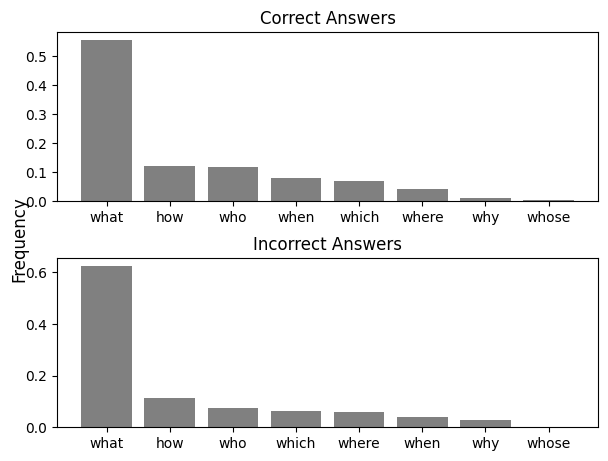

In [88]:
fig, axs = plt.subplots(2)
fig.tight_layout(pad=2.0)

correct_data = df.loc[df["correct_answer"], "question_word"].value_counts(normalize=True)
incorrect_data = df.loc[df["correct_answer"] == False, "question_word"].value_counts(normalize=True)

axs[0].bar(correct_data.index, correct_data.values, color="gray")
axs[0].set_title("Correct Answers")
axs[1].bar(incorrect_data.index, incorrect_data.values, color="gray")
axs[1].set_title("Incorrect Answers")

fig.supylabel("Frequency");

In [89]:
errors.sample(n=50)

,id,title,context,question,predicted_answer,text,answer_start,ans1,ans2,ans3,ans4,ans5,ans6,question_word
3474,571bb2269499d21900609caa,Oxygen,Oxygen is a chemical element with symbol O and...,What element makes up almost half of the earth...,silicon dioxide,"[Oxygen, Oxygen, Oxygen, Oxygen, Oxygen]","[661, 661, 661, 661, 661]",Oxygen,Oxygen,Oxygen,Oxygen,Oxygen,None,what
1727,56e1a564cd28a01900c67a4a,Computational_complexity_theory,"If the input size is n, the time taken can be ...",What term corresponds to the maximum measureme...,worst-case time complexity T(n),"[worst-case time complexity, worst-case time c...","[156, 156, 152]",worst-case time complexity,worst-case time complexity,the worst-case time complexity,None,None,None,what
8669,57294baaaf94a219006aa26b,Intergovernmental_Panel_on_Climate_Change,"Michael Oppenheimer, a long-time participant i...",What role did Michael Oppenheimer have in the ...,a long-time participant,[coordinating lead author of the Fifth Assessm...,"[61, 33, 61]",coordinating lead author of the Fifth Assessme...,participant in the IPCC and coordinating lead ...,coordinating lead author of the Fifth Assessme...,None,None,None,what
3022,570d4e6cb3d812140066d66e,Victoria_(Australia),The Premier of Victoria is the leader of the p...,Who sets the legislative agenda in Victoria?,cabinet,"[Premier, The Premier is the public face of go...","[127, 123, 4]",Premier,The Premier is the public face of government a...,Premier of Victoria,None,None,None,who
5363,57269526dd62a815002e8a50,Newcastle_upon_Tyne,There are eleven LEA-funded 11 to 18 schools a...,What is the largest co-ed independent school i...,Royal Grammar School,"[the Royal Grammar School, the Royal Grammar S...","[423, 423, 423]",the Royal Grammar School,the Royal Grammar School,the Royal Grammar School,None,None,None,what
5651,5726fb18dd62a815002e96d1,Victoria_and_Albert_Museum,The sculpture collection at the V&A is the mos...,Which uses of sculpture are represented in the...,"portrait, allegorical, religious, mythical, st...","[All, All uses, All]","[438, 438, 438]",All,All uses,All,None,None,None,which
3716,5725b33f6a3fe71400b8952e,1973_oil_crisis,The 1973 oil crisis began in October 1973 when...,What was the price of oil in March of 1974?,US$3 per barrel,"[nearly $12, $12, $12, $12, $12]","[305, 312, 312, 312, 312]",nearly $12,$12,$12,$12,$12,None,what
2225,56f8074faef2371900625d7b,Martin_Luther,It was not until January 1518 that friends of ...,Who translated and printed Luther's 95 These?,friends,"[friends of Luther, friends of Luther, friends...","[35, 35, 35]",friends of Luther,friends of Luther,friends of Luther,None,None,None,who
9494,572fc41f947a6a140053cc81,Scottish_Parliament,The Presiding Officer (or Deputy Presiding Off...,What is also decided by the Presiding Officer?,who speaks in chamber debates and the amount o...,[amount of time for which they are allowed to ...,"[98, 98, 94]",amount of time for which they are allowed to s...,amount of time for which they are allowed to s...,the amount of time for which they are allowed ...,None,None,None,what
765,56d9ca0adc89441400fdb823,Super_Bowl_50,There would be no more scoring in the third qu...,How many of the following three fourth quarter...,one,"[three, three, The next three drives]","[444, 444, 435]",three,three,The next three drives,None,None,None,how
